In [28]:
# MODULE 1: DATA LOADING & BASIC PREPROCESSING


# 1️) Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2️) Load the dataset

df = pd.read_csv("wellbot_health_wellness_dataset.csv")

In [21]:
# 3️) Basic overview
print(" Dataset loaded successfully!")
print("Shape of dataset:", df.shape)       
print("\nColumn Names:\n", df.columns.tolist())

# 4️) data
print("\n First 5 rows (head):")
print(df.head())

print("\n Last 5 rows (tail):")
print(df.tail())

 Dataset loaded successfully!
Shape of dataset: (80000, 26)

Column Names:
 ['User_ID', 'Age', 'Gender', 'Country', 'Occupation', 'Height_cm', 'Weight_kg', 'BMI', 'Daily_Steps', 'Calories_Intake', 'Hours_of_Sleep', 'Exercise_Frequency', 'Diet_Type', 'Water_Intake_Liters', 'Smoking_Status', 'Alcohol_Consumption', 'Stress_Level', 'Anxiety_Score', 'Depression_Score', 'Work_Life_Balance_Score', 'Social_Interaction_Score', 'Sleep_Quality_Score', 'Mood_Score', 'Therapy_Consultation', 'Medication_Usage', 'Overall_Wellbeing_Score']

 First 5 rows (head):
   User_ID   Age  Gender Country  Occupation  Height_cm  Weight_kg   BMI  \
0      1.0  56.0  female     USA  unemployed      160.0       48.0  31.4   
1      2.0  69.0  female     USA     retired      166.0       94.0  28.3   
2      NaN  46.0  female  Canada         NaN      177.0      109.0  29.2   
3      4.0  32.0  female     USA     working        NaN       83.0  21.6   
4      5.0  60.0  female     USA     student      183.0       61.0 

In [22]:
# 5️) Data types and summary information
print("\n Dataset Information:")
print(df.info())

print("\n Statistical Summary (Numerical Columns):")
print(df.describe())

# 6️) Checking for missing values
print("\n Missing Values per Column:")
print(df.isnull().sum())


 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User_ID                   76000 non-null  float64
 1   Age                       76000 non-null  float64
 2   Gender                    71804 non-null  object 
 3   Country                   70991 non-null  object 
 4   Occupation                70324 non-null  object 
 5   Height_cm                 76000 non-null  float64
 6   Weight_kg                 76000 non-null  float64
 7   BMI                       76000 non-null  float64
 8   Daily_Steps               76000 non-null  float64
 9   Calories_Intake           76000 non-null  float64
 10  Hours_of_Sleep            76000 non-null  float64
 11  Exercise_Frequency        71490 non-null  object 
 12  Diet_Type                 69740 non-null  object 
 13  Water_Intake_Liters       76000 non-nu

In [23]:
# 7️⃣ Handle missing numerical values safely
num_cols = [
    'Age', 'Height_cm', 'Weight_kg', 'BMI',
    'Daily_Steps', 'Calories_Intake', 'Hours_of_Sleep',
    'Water_Intake_Liters', 'Exercise_Frequency',
    'Work_Life_Balance_Score', 'Social_Interaction_Score',
    'Sleep_Quality_Score', 'Mood_Score',
    'Stress_Level', 'Anxiety_Score', 'Depression_Score'
]

for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # ensure numeric
        df[col] = df[col].fillna(df[col].mean())           # replace NaN with mean

print("\nShape after replacing missing numerical values:", df.shape)


# 7️⃣ Handle missing categorical values safely
cat_cols = ['Gender', 'Country', 'Occupation', 'Diet_Type',
            'Smoking_Status', 'Alcohol_Consumption', 
            'Therapy_Consultation', 'Medication_Usage']

for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])       # replace NaN with mode
        df[col] = df[col].astype(str).str.lower().str.strip()  # clean strings




Shape after replacing missing numerical values: (80000, 26)


In [24]:
# 9️) Quick data insights
print("\nAverage hours of sleep:", round(df['Hours_of_Sleep'].mean(), 2))
print("Average daily steps:", round(df['Daily_Steps'].mean(), 2))
print("Average calorie intake:", round(df['Calories_Intake'].mean(), 2))



Average hours of sleep: 7.0
Average daily steps: 8039.56
Average calorie intake: 2497.42


In [25]:
# 10) Saving cleaned dataset
df.to_csv("health_lifestyle_cleaned.csv", index=False)
print("\n Cleaned dataset saved as 'health_lifestyle_cleaned.csv'")


print("\n Final Head:")
print(df.head())

print("\n Final Tail:")
print(df.tail())


 Cleaned dataset saved as 'health_lifestyle_cleaned.csv'

 Final Head:
   User_ID   Age  Gender Country  Occupation   Height_cm  Weight_kg   BMI  \
0      1.0  56.0  female     usa  unemployed  160.000000       48.0  31.4   
1      2.0  69.0  female     usa     retired  166.000000       94.0  28.3   
2      NaN  46.0  female  canada     retired  177.000000      109.0  29.2   
3      4.0  32.0  female     usa     working  169.486073       83.0  21.6   
4      5.0  60.0  female     usa     student  183.000000       61.0  18.7   

   Daily_Steps  Calories_Intake  ...  Stress_Level  Anxiety_Score  \
0       9113.0      2964.000000  ...     10.000000            9.0   
1      14746.0      3100.000000  ...      7.000000            9.0   
2       8649.0      2497.434667  ...      6.000000            8.0   
3       1016.0      2686.000000  ...      2.000000            8.0   
4      13526.0      2497.434667  ...      5.500963           10.0   

  Depression_Score  Work_Life_Balance_Score Social

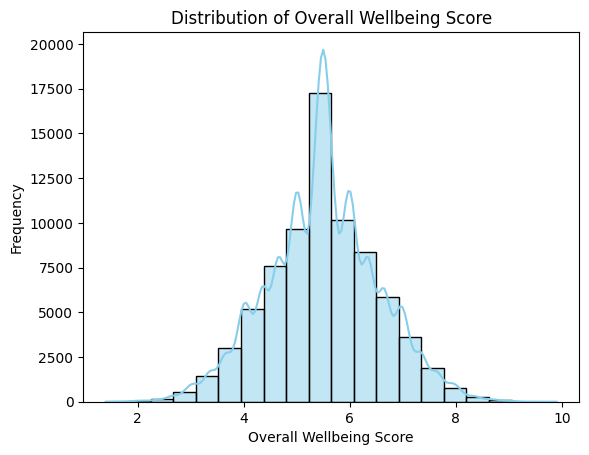

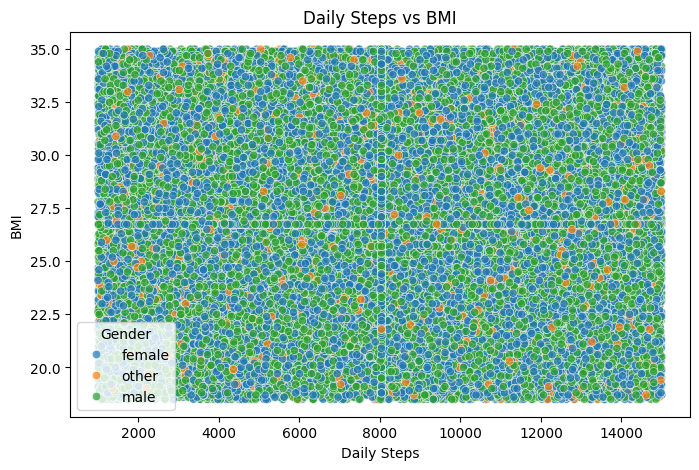

In [29]:
#  Distribution of Overall_Wellbeing_Score

sns.histplot(df['Overall_Wellbeing_Score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Overall Wellbeing Score')
plt.xlabel('Overall Wellbeing Score')
plt.ylabel('Frequency')
plt.show()


#  Relationship between Daily_Steps and BMI
plt.figure(figsize=(8,5))
sns.scatterplot(x='Daily_Steps', y='BMI', data=df, hue='Gender', alpha=0.7)
plt.title('Daily Steps vs BMI')
plt.xlabel('Daily Steps')
plt.ylabel('BMI')
plt.legend(title='Gender')
plt.show()